# Python 

## Motivation

[Python](https://en.wikipedia.org/wiki/Python_(programming_language)) has developed into an (almost) indispensable tool in computational and engineering sciences, in particular in combination with Jupyter notebooks {cite}`Perkel2015, Perkel2018`.

Python offers an intuitive syntax with a high degree of code readability and it is used for everything from simple scripting and fast prototyping to large-scale projects.

Python is open source and free for use and distribution. It is available for all relevant platforms, including

- Linux
- MacOS
- Windows

## Important modules

Python code is typically written in the form of functions that are stored in libraries (or *modules*) and made available with the `import` statement. 

Modules of specific concern in this course include

- [NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) introduces multi-dimensional arrays and provides efficient array operations
- [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html) provides mathematical algorithms and convenience functions built on NumPy
- [Matplotlib](https://matplotlib.org/stable/users/index.html) is a visualization library in Python for plotting arrays
- [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html) is a flexible data analysis/manipulation tool
- [Mesa](https://mesa.readthedocs.io/en/stable/) enables agent-based modeling in Python

## Documentation

The amount of Python documentation is vast and so is the community of module contributers. If you are in search of the solution to an isolated task or  problem, there is a great chance that someone has contributed an efficient and stable implementation on the web.

- If you are new to Python, it can be a good idea to first read one of the several books available to get a coherent introduction. A recommended choice is the book titled *A Whirlwind Tour of Python* authored by Jake VanderPlas as it provides a short, clear, and to-the-point presentation {cite}`VanderPlas2016`.

- If you have some experience and rather benefit from a more reference-oriented documentation, a recommended source is [W3Schools](https://www.w3schools.com/python/python_intro.asp).

- If you find watching tutorial videos useful, the series made by Corey Schafer is recommended. Below is one example from this series.

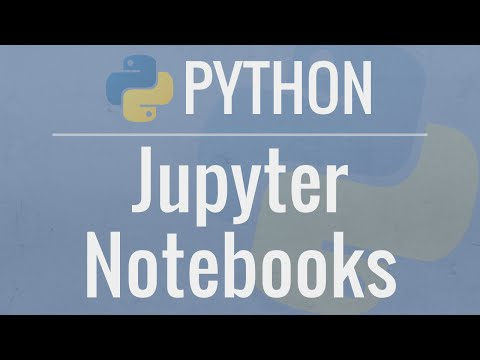

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("HW29067qVWk")

## Some necessities

### Iterations
A `for` loop is used for iterating over an iterable object (such as a list, dictionary, or string).

A "standard" loop is accomplished with the `range` function. The `range` function returns an iterable sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a specified number.

In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


### Data types
Basic Python data types include `integer`, `float`, `string`, `list`, and `dictionary`. 

In [2]:
i = 10  # integer
x = 3.1415  # float
s = "text"  # string

a_list = [x, [1, 2, 3]]  # list
b_dict = {"first": s, "second": a_list}  # dictonary

print("Elements in list:")
for i, a in enumerate(a_list):
    print(i, a, a_list[i])

print("Elements in dictionary:")
for key in b_dict.keys():
    print("Key, value:", key, b_dict[key])

Elements in list:
0 3.1415 3.1415
1 [1, 2, 3] [1, 2, 3]
Elements in dictionary:
Key, value: first text
Key, value: second [3.1415, [1, 2, 3]]


The object type is revealed by the `type` function.

In [3]:
type(a_list)

list

```{note}
A Python `list` with $N$ elements is indexed from 0 to $(N-1)$.
```

### Conditions
Python supports the usual logical conditions:

- Equal: `a == b`
- Not Equal: `a != b`
- Less than: `a < b`
- Less than or equal to: `a <= b`
- Greater than: `a > b`
- Greater than or equal to: `a >= b`

These conditions are typically used in conjunction with `if` statements.

In [4]:
alcohols = {
    "cyclohexanol": {"formula": "C6H11OH", "boiling point": 162},
    "ethanol": {"formula": "CH3-CH2OH", "boiling point": 78},
    "isopropanol": {"formula": "CH3-CHOH-CH3", "boiling point": 80},
    "methanol": {"formula": "CH3OH", "boiling point": 65},
    "phenylmethanol": {"formula": "C6H5-CH2OH", "boiling point": 205},
}

lowest_bp = 9999
for key in alcohols.keys():
    if alcohols[key]["boiling point"] < lowest_bp:
        alc_with_lowest_bp = key
        lowest_bp = alcohols[key]["boiling point"]

print(alc_with_lowest_bp.capitalize(), "has the lowest boiling point.")
print("It has chemical formula:", alcohols[alc_with_lowest_bp]["formula"])
print("It has a boiling point of", lowest_bp, "degrees Celsius.")

Methanol has the lowest boiling point.
It has chemical formula: CH3OH
It has a boiling point of 65 degrees Celsius.


### Arrays with NumPy

Arrays (such as vectors and matrices) should be represented as objects of the NumPy `ndarray` class. [Array creation](https://numpy.org/doc/stable/user/basics.creation.html) can be performed in numerous ways. Two ways to create a NumPy `array` from a Python `list` are given below.

In [5]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Alternative 1:\n", a)

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((3, 3))
print("Alternative 2:\n", a)

Alternative 1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Alternative 2:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


There are several predeifined arrays, all available for different data types.

In [6]:
a = np.zeros((3, 3), dtype="int")
print("Zero matrix:\n", a)

a = np.ones((3, 3), dtype="float")
print("One matrix:\n", a)

a = np.identity(3, dtype="complex")
print("Identity matrix:\n", a)

Zero matrix:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
One matrix:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Identity matrix:
 [[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j]]


#### Array operations

Array operations should be performed with NumPy routines. The NumPy array operation routines are based on optimized libraries that enable multi-thread execution with use of [OpenMP](https://en.wikipedia.org/wiki/OpenMP). On a computer equipped with an Intel processor, the underlying library for NumPy is normally chosen as the [Math Kernel Library (MKL)](https://en.wikipedia.org/wiki/Math_Kernel_Library). Never feel tempted to use `for` loops as the performance is tyically orders of magnitude slower. The two most important Numpy array operations are

- `dot(a,b)`: [vector dot product](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
- `matmul(a,b)`: [matrix mulitplication](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)

A comparison of the use of `matmul` and `for` loops for the multiplication of two matrices of dimension 100$\times$100 shows the following execution times (in ms).

In [7]:
import time

# Fixing random state for reproducibility
np.random.seed(20210802)

N = 100

a = np.random.rand(N * N).reshape((N, N))
b = np.random.rand(N * N).reshape((N, N))

ti = time.time()

c = np.matmul(a, b)

tf = time.time()

print(f"  matmul: {(tf - ti) * 1000:10.4f} (ms)")

ti = time.time()

for i in range(N):
    for j in range(N):
        for k in range(N):
            c[i, j] = a[i, k] * b[k, j]

tf = time.time()

print(f"for loop: {(tf - ti) * 1000:10.4f} (ms)")

  matmul:     2.4350 (ms)
for loop:   780.5278 (ms)


### Classes and object-oriented programming
Python naturally invites to good software engineering practices in terms of [object-oriented programming](https://www.w3schools.com/python/python_classes.asp). Almost everything in Python is an `object`, with its properties and methods and a `class` is like an object constructor, or a “blueprint” for creating objects known as *instances* of the class.

It cannot be overemphasized that the use of object-oriented programming is highly enabling for code sharing and team development, and it is strongly recommended to adopt these practices.

As an example, we implement a *class* `Triangle` with a *method* `area` and *attributes* `base` and `height`.

In [8]:
class Triangle:
    def __init__(self, base, height):
        self.base = base
        self.height = height

    def area(self):
        A = self.base * self.height / 2
        return A

```{note}

The instance reference is automatically passed as the first argument to the methods. By convention, this argument should be recieved as a parameter named `self`.

The `__init__` method is executed every time a new instance of the class is created.
```

It is a common practice to store the code of classes in separate library files (or modules) with the file extension `*.py`. In this case, we can imagine that we store the `Triangle` class together with several other geometric objects into a module named `geometry.py` after which these would be readily available from other modules by means of an `import` statement:

```
import geometry as gm
```

where `gm` is an optional shorter name reference of your choice.

The user of such an encapsulated module need not be concerned about the details of the code which is the key enabling factor for code-sharing. We define an instance of this class according to

```
t = gm.Triangle(3, 5)
```

and execute the function that calculates the area and print out the result as follows

```
print("Area:", t.area())
```

If the class is kept in the notebook the `import` statement is obviously not needed and we instead access the instance attributes and methods as follows

In [9]:
t = Triangle(3, 5)  # class instance

print("Base:", t.base)  # instance attribute
print("Height:", t.height)  # instance attribute

print("Area:", t.area())  # instance method

Base: 3
Height: 5
Area: 7.5


### Plotting with Matplotlib

Let us use `NumPy` to generate an array of random numbers distributed according to the Gaussian distribution

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}
e^{-(x-\mu)^2 / (2\sigma^2)}
$$

In [25]:
import numpy as np

# Fixing random state for reproducibility
np.random.seed(20210722)

mu, sigma = 10, 0.1  # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)  # return a NumPy array

print("Object type:", type(s))
print("Number of values:", len(s))
print(f"Mean value: {np.mean(s) : .4f}")
print(f"Standard deviation: {np.std(s) : .4f}")

Object type: <class 'numpy.ndarray'>
Number of values: 5000
Mean value:  10.0002
Standard deviation:  0.0996


We use `Matplotlib` to plot a histogram of the density distribution of the random numbers and compared it to the analytical Gaussian distribution function $f(x)$ given above.

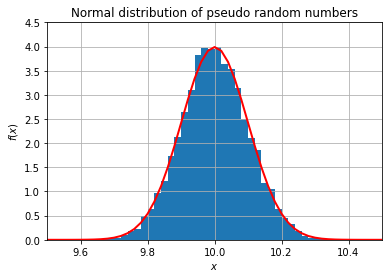

In [31]:
import matplotlib.pyplot as plt

counts, x, patches = plt.hist(s, bins=50, range=(9.5, 10.5), density=True)

f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sigma**2))

plt.plot(x, f, linewidth=2, color="r")

plt.grid(True)
plt.setp(plt.gca(), xlim=(9.5, 10.5), ylim=(0, 4.5))
plt.title("Normal distribution of pseudo random numbers")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")

# save the figure in your favorite format
# plt.savefig('figname.pdf')
# plt.savefig('figname.png')

plt.show()

(sec:pandas)=
## Dataframes with Pandas

The [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started) module is a powerful tool for data manipulation and analysis. Pandas allows for the import and export of data in several standard formats such as [comma-separatped values](https://en.wikipedia.org/wiki/Comma-separated_values) (.csv) and [Microsoft Excel](https://en.wikipedia.org/wiki/Microsoft_Excel) (.xls). If you are working with spreadsheets for data handling and would benefit from automatized ways to merge, reshape, select, clean, wrangle, plot, etc. your data, then you are likely to benefit from pandas. 

In [ ]:
import pandas as pd

### Create dataframe from spreadsheet

The most important class in pandas is `DataFrame`. An object of this class corresponds to a sheet in an Excel file. A dataframe can be constructed with the method `read.excel`:

```
pd.read_excel("path_to_file.xls", sheet_name="Sheet1")
```

### Create dataframe from Python dictionary

Dataframes can also be thought of as Python dictionaries and we can also create a dataframe from a Python dictonary.

In [ ]:
results = {"Name": ["Alice", "Ceasar", "David", "Beatrice"], "Result": [33, 25, 18, 22]}

# create dataframe
df = pd.DataFrame(results)

# display the 5 first lines
df.head(5)

### Manipulate data

We can sort the dataframe by a certain column.

In [ ]:
df.sort_values(by="Name", ascending=True)

### Analyse data

We can list a selection of elements in the dataframe, say those students that passed the examination point limit.

In [ ]:
df[df["Result"] > 20]

We can perform statistical anlyses on the dataframe.

In [ ]:
print("Averaged result is equal to", df["Result"].mean(), "points.")

In [ ]:
df["Result"].describe()

### Plot data
We can plot the data in the dataframe. Pandas has built-in [dataframe plot functionality](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) using [matplotlib](https://matplotlib.org/) as the underlying plot engine, so you can also import `matplotlib.pyplot` for additional plot control.

In [ ]:
import matplotlib.pyplot as plt

df.plot(x="Name", y="Result", kind="bar", ylabel="Points on exam")

plt.setp(plt.gca(), xticklabels=list(df["Name"]))
plt.axhline(20, color="lightgrey")
plt.show()

## Python help function

The Python `help` function is used to display the documentation of modules, functions, classes, keywords etc.

In [46]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `